In [183]:
import numpy as np
from sympy import *
import scipy as sp
!pip install control
from control import lqr
import scipy.linalg
import matplotlib as mpl
import matplotlib.pyplot as plt

In [184]:
h = 1e-3
g = 9.81
m = 0.5 #kg
l = 0.225
kT = 2.980e-6
kH = 1.140e-7
Ix = 4.856e-3
Iy = 4.856e-3
Iz = 8.801e-3

a1 = (Iy-Iz)/Ix
a2 = (Iz-Ix)/Iy
a3 = (Ix-Iy)/Iz

b1 = l/Ix
b2 = l/Iy
b3 = l/Iz

ommax = 2500 #omega_max in rad/s

#CONTROL INPUTS ARE THE FOLLOWING:
#u_i = om_i^2

In [185]:
A = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, g, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
              [-g, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

B = np.array([[0, 0, 0, 0],
              [0, b1*kT, 0, -b1*kT],
              [0, 0, 0, 0],
              [-b2*kT, 0, b2*kT, 0],
              [0, 0, 0, 0],
              [b3*kH, -b3*kH, b3*kH, -b3*kH],
              [0, 0, 0, 0],
              [kT/m, kT/m, kT/m, kT/m],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0],
              [0, 0, 0, 0]])

Phi = np.array([[1,h,0,0,0,0,0,0,0,0,0,0],
                [0,1,0,0,0,0,0,0,0,0,0,0],
                [0,0,1,h,0,0,0,0,0,0,0,0],
                [0,0,0,1,0,0,0,0,0,0,0,0],
                [0,0,0,0,1,h,0,0,0,0,0,0],
                [0,0,0,0,0,1,0,0,0,0,0,0],
                [0,0,0,0,0,0,1,h,0,0,0,0],
                [0,0,0,0,0,0,0,1,0,0,0,0],
                [0,(g*h**2)/2.,0,0,0,0,0,0,1,h,0,0],
                [0,g*h,0,0,0,0,0,0,0,1,0,0],
                [-(g*h**2)/2.,-(g*h**3)/6.,0,0,0,0,0,0,0,0,1,h],
                [-(g*h),-(g*h**2)/2.,0,0,0,0,0,0,0,0,0,1]])

Gamma = np.array([[0,(h**2*b1*kT)/2.,0,-(h**2*b1*kT)/2.],
                  [0,h*b1*kT,0,-(h*b1*kT)],
                  [-(h**2*b2*kT)/2.,0,(h**2*b2*kT)/2.,0],
                  [-(h*b2*kT),0,h*b2*kT,0],
                  [(h**2*b3*kH)/2.,-(h**2*b3*kH)/2., (h**2*b3*kH)/2., -(h**2*b3*kH)/2.],
                  [h*b3*kH,-(h*b3*kH),h*b3*kH, -(h*b3*kH)],
                  [(h**2*kT)/(2.*m),(h**2*kT)/(2.*m),(h**2*kT)/(2.*m),(h**2*kT)/(2.*m)],
                  [(h*kT)/m,(h*kT)/m,(h*kT)/m,(h*kT)/m],
                  [0,(g*h**3*b1*kT)/6.,0,-(g*h**3*b1*kT)/6.],
                  [0,(g*h**2*b1*kT)/2.,0,-(g*h**2*b1*kT)/2.],
                  [0,-(g*h**4*b1*kT)/24.,0,(g*h**4*b1*kT)/24.],
                  [0,-(g*h**3*b1*kT)/6.,0,(g*h**3*b1*kT)/6.]])

C = np.eye(12)

Umat = np.array([
    [kT, kT, kT, kT],
    [0, kT, 0, -kT],
    [-kT, 0, kT, 0],
    [kH, -kH, kH, -kH]
])

In [186]:
K = np.array([[-1.44439831e+02,  4.20878460e-09, -5.02367636e+02,
        -2.15587997e+03,  1.77660941e+02,  5.53223894e+03,
         6.20119571e+02,  7.31858231e+03,  2.29775508e-03,
         1.47237340e+01, -7.61023691e-10,  2.29775497e-03],
       [ 2.42041489e+04,  1.24860983e+04,  2.08935836e-09,
        -3.07382087e-11, -1.77660941e+02, -5.53223894e+03,
         6.20119571e+02,  7.31858231e+03,  2.37669561e-02,
        -2.86272009e+02, -4.37772965e+02, -1.69343728e+03],
       [-7.77149241e+02, -4.85188601e-09,  5.02367636e+02,
         2.15587997e+03,  1.77660941e+02,  5.53223894e+03,
         6.20119570e+02,  7.31858231e+03,  1.24249590e-02,
         7.92201061e+01, -6.80548717e-10,  1.24249626e-02],
       [-2.49092907e+04, -1.24860983e+04,  2.17729251e-09,
         9.01346550e-09, -1.77660941e+02, -5.53223894e+03,
         6.20119571e+02,  7.31858231e+03, -1.24909247e-02,
         3.58151920e+02,  4.37772965e+02,  1.69344855e+03]])

Q = 1e-3*np.diag(np.ones(12)) + 1e4*np.diag([0, 0, 0, 0, 1, 0, 30, 5, 10, 5, 10, 5])
R = np.diag(np.ones(4))


def rt(ph, th):
    return np.cos(ph)*np.cos(th)

def rx(ph, th, ps):
    return np.cos(ph)*np.sin(th)*np.cos(ps) + np.sin(ph)*np.sin(ps)

def ry(ph, th, ps):
    return np.cos(ph)*np.sin(th)*np.sin(ps) - np.sin(ph)*np.cos(ps)

x0 = np.zeros(12)

def xref1(t):
    # Hover 1 m
    xr = np.zeros(12)

    xr[6] = 1
    # xr[7] = 1e-2

    return xr

def xref2(t):
    # Ascent and circle
    xr = np.zeros(12)

    T = 20

    # Get to altitude of 1 m
    if t < T:
        xr[6] = 1
    else:
        xr[6] = 1

        tau = t - T

        # x
        xr[8] = 2*np.cos(0.25*tau)
        xr[9] = -0.5*np.sin(0.25*tau)

        # y
        xr[10] = 2*np.sin(0.25*tau)
        xr[11] = 0.5*np.cos(0.25*tau)

    return xr

def xref3(t):
    # Complex maneuver
    xr = np.zeros(12)

    T = 20
    T2 = 10
    T3 = 30
    T4 = 10
    T5 = 150

    # Get to altitude of 1 m
    if t < T:
        xr[6] = 1
    # Straight line in x-direction at 1 m/s up to x=5
    elif t < T + T2:
        xr[6] = 1

        tau = t - T

        # x
        xr[8] = np.min(tau, 5)
        xr[9] = 1 if np.min(tau, 5) < 5 else 0
    # Yaw 90-degrees counterclockwise
    elif t < T + T2 + T3:
        xr[6] = 1

        tau = t - T - T2

        xr[4] = np.pi/2
        xr[8] = 5
    # Straight line in y-direction at 1 m/s up to y=5
    elif t < T + T2 + T3 + T4:
        xr[6] = 1

        tau = t - T - T2 - T3

        xr[4] = np.pi/2
        xr[8] = 5

        # y
        xr[10] = np.min(tau, 5)
        xr[11] = 1 if np.min(tau, 5) < 5 else 0
    # Descent with max velocity 1 cm/s
    elif t < T + T2 + T3 + T4 + T5:
        tau = t - T - T2 - T3 - T4

        # z
        xr[6] = max(1 - tau*1e-2, 0)
        xr7[7] = -1e-2 if (1 - tau*1e-2) > 0 else 0

        # x
        xr[8] = 5

        # y
        xr[10] = 5

    return xr

def ufunc(t, x, xref):
    u = -K @ (x-xref(t))
    # print(t, u)
    return u

def f(t, x, xref):
    # print(f"t = {t}")
    u_cmd = ufunc(t, x, xref)
    u = Umat @ u_cmd

    x[0] = x[0] % (2*np.pi)
    x[2] = x[2] % (2*np.pi)
    x[4] = x[4] % (2*np.pi)

    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12 = x
    u1, u2, u3, u4 = u

    xdot = np.array([
        x2,
        x4*x6*a1 + b1*u2,
        x4,
        x2*x6*a2 + b2*u3,
        x6,
        x2*x4*a3 + b3*u4,
        x8,
        -g + rt(x1, x3) * u1/m,
        x10,
        rx(x1, x3, x5) * u1/m,
        x12,
        ry(x1, x3, x5) * u1/m
    ])

    return xdot

def fnonlin(t, x, u_cmd):
    u = Umat @ u_cmd

    x[0] = x[0] % (2*np.pi)
    x[2] = x[2] % (2*np.pi)
    x[4] = x[4] % (2*np.pi)

    x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12 = x
    u1, u2, u3, u4 = u

    xdot = np.array([
        x2,
        x4*x6*a1 + b1*u2,
        x4,
        x2*x6*a2 + b2*u3,
        x6,
        x2*x4*a3 + b3*u4,
        x8,
        -g + rt(x1, x3) * u1/m,
        x10,
        rx(x1, x3, x5) * u1/m,
        x12,
        ry(x1, x3, x5) * u1/m
    ])

    return xdot

def flin1(t, x):
    # print(f"t = {t}")
    # u = ufunc(t, x, xref)

    u = -K @ x

    x[0] = x[0] % (2*np.pi)
    x[2] = x[2] % (2*np.pi)
    x[4] = x[4] % (2*np.pi)

    xdot = A @ x + B @ u

    return xdot

In [187]:
T1 = 1000
h = 1e-3
t_l1 = np.arange(0, T1, h)

x0 = np.zeros(12)
x_l = [x0]
u_l = [np.zeros(4)]
for t in t_l1[1:]:
    u_l.append(ufunc(t, x_l[-1], xref1))
    x_l.append(Phi @ x_l[-1] - Gamma @ (K @ (x_l[-1] - xref1(t))))

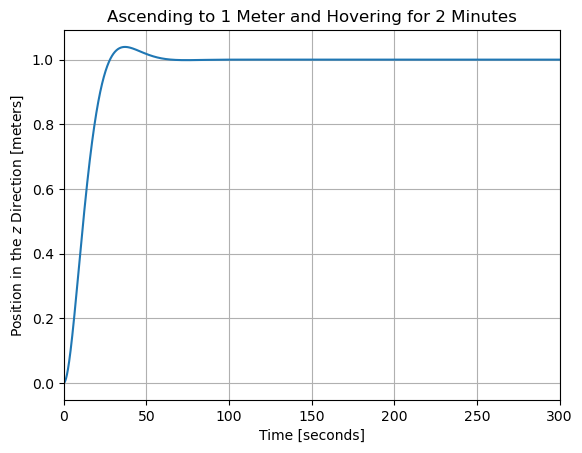

In [188]:
plt.plot(t_l1, [x[6] for x in x_l])
plt.xlim(0, 300)
plt.xlabel('Time [seconds]')
plt.ylabel("Position in the $z$ Direction [meters]")
plt.title('Ascending to 1 Meter and Hovering for 2 Minutes')
plt.grid()
plt.savefig('Hovering for 2 minutes')

In [189]:
Q1 = 1.5e1*np.diag([525.249016, 2100.99606401, 525.249016, 2100.99606401, 131.312254, 525.249016, 1600, 6400, 22000, 6400, 10400e3, 1600])
Q2 = 1.2*np.diag(np.ones(4)*(ommax**(-2)))

K = np.array([[ 2.76013048e+06, -1.40741986e-06, -1.37651173e+05,
        -2.77107021e+05,  5.06021766e+04,  1.37563087e+05,
         1.75990495e+05,  3.72363963e+05, -1.58670159e+02,
        -2.81358869e+05, -1.25970743e-04, -1.58669917e+02],
       [-3.39674081e+07,  3.60208222e+05, -7.52001300e-05,
         6.27972094e-07, -5.06021766e+04, -1.37563087e+05,
         1.75990495e+05,  3.72363963e+05,  2.41967905e+03,
         4.25003354e+06, -1.91382226e+07, -5.56302767e+06],
       [-2.67952603e+06, -1.34635291e-07,  1.37651173e+05,
         2.77107021e+05,  5.06021766e+04,  1.37563087e+05,
         1.75990495e+05,  3.72363963e+05,  1.54034453e+02,
         2.73142305e+05, -3.35556933e-04,  1.54034722e+02],
       [ 3.40515249e+07, -3.60208222e+05,  6.92436831e-05,
        -5.67992622e-07, -5.06021766e+04, -1.37563087e+05,
         1.75990495e+05,  3.72363963e+05, -2.42451682e+03,
        -4.25860696e+06,  1.91382226e+07,  5.56302284e+06]])


def xref2(t):
    # Ascent and circle
    xr = np.zeros(12)

    T = 10
    R = 2
    R1 = R
    R2 = R
    V = 2 

    # Get to altitude of 1 m
    if t < T:
        xr[6] = 1
    else:
        xr[6] = 1

        tau = t - T

        # x
        xr[8] = R1*np.sin((V/R)*tau)

        # y
        xr[10] = R2*(np.cos((V/R)*tau)-1)

    return xr

T2 = 30
t_l2 = np.linspace(0, T2, 100000)

dt = t_l2[1]
x_l2 = [x0]
u_l2 = [np.zeros(4)]
for t in t_l2[1:]:
    u = ufunc(t, x_l2[-1], xref2)
    # u = np.abs(u)
    u_l2.append(u)
    xdot = A @ x_l2[-1] - B @ (K @ (x_l2[-1] - xref2(t)))
    x_l2.append(x_l2[-1] + dt * xdot)

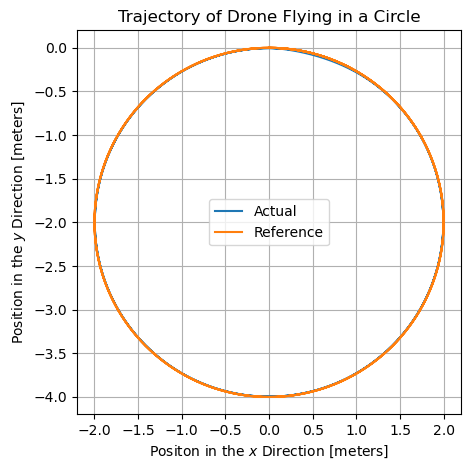

In [190]:
plt.plot([x[8] for x in x_l2], [x[10] for x in x_l2], label = 'Actual')
plt.plot([xref2(t)[8] for t in t_l2], [xref2(t)[10] for t in t_l2], label = 'Reference')
plt.title('Trajectory of Drone Flying in a Circle')
plt.xlabel('Positon in the $x$ Direction [meters]')
plt.ylabel('Position in the $y$ Direction [meters]')
plt.legend()
plt.grid()
plt.gca().set_aspect(1)
plt.tight_layout()
plt.savefig('Circling Trajectory')

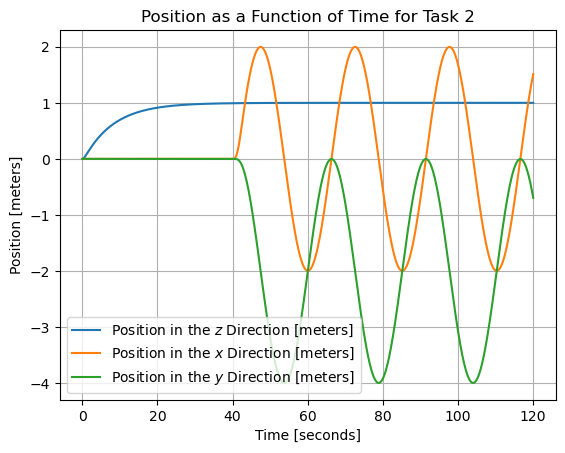

In [191]:
t_l = np.asarray(t_l2) * 4
plt.plot(t_l, [x[6] for x in x_l2], label='Position in the $z$ Direction [meters]')
plt.plot(t_l, [x[8] for x in x_l2], label='Position in the $x$ Direction [meters]')
plt.plot(t_l, [x[10] for x in x_l2], label = 'Position in the $y$ Direction [meters]')
plt.grid()
plt.xlabel('Time [seconds]')
plt.ylabel('Position [meters]')
plt.title('Position as a Function of Time for Task 2')
plt.legend()
plt.savefig('Task 2')

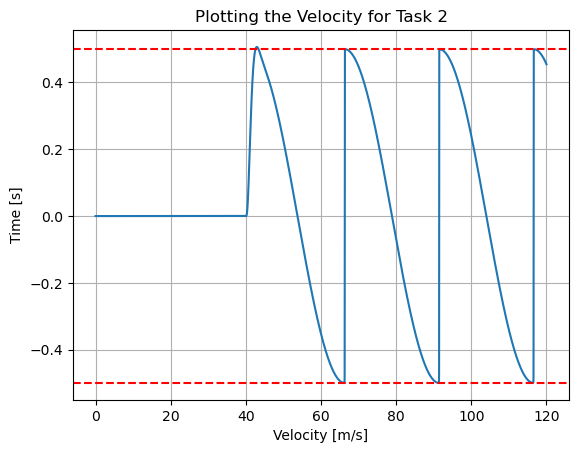

In [192]:
plt.xlabel('Velocity [m/s]')
plt.ylabel('Time [s]')
plt.title('Plotting the Velocity for Task 2')
plt.plot(t_l, np.gradient([np.linalg.norm([x[8], x[10]]) for x in x_l2], t_l))
plt.axhline(0.5, linestyle='--', color='r')
plt.axhline(-0.5, linestyle='--', color='r')
plt.grid()

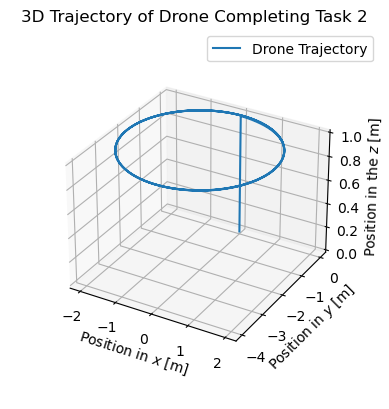

In [193]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot([x[8] for x in x_l2], [x[10] for x in x_l2], [x[6] for x in x_l2], label='Drone Trajectory')


ax.set_xlabel('Position in $x$ [m]')
ax.set_ylabel('Position in $y$ [m]')
ax.set_zlabel('Position in the $z$ [m]')
ax.set_title('3D Trajectory of Drone Completing Task 2')

ax.legend()

ax.set_box_aspect(aspect=None, zoom=0.8)

plt.savefig('3D_Trajectory Task 2', bbox_inches = 0)
plt.show()


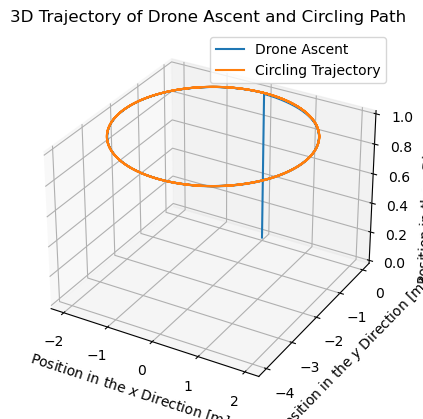

In [194]:
# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the drone's trajectory (ascent)
ax.plot([x[8] for x in x_l2], [x[10] for x in x_l2], [x[6] for x in x_l2], label='Drone Ascent')

# Plot the reference trajectory (circling trajectory)
ax.plot([xref2(t)[8] for t in t_l2], [xref2(t)[10] for t in t_l2], [xref2(t)[6] for t in t_l2], label='Circling Trajectory')

# Add labels and title
ax.set_xlabel('Position in the $x$ Direction [m]')
ax.set_ylabel('Position in the $y$ Direction [m]')
ax.set_zlabel('Position in the $z$ Direction [m]')
ax.set_title('3D Trajectory of Drone Ascent and Circling Path')

# Display the legend with the new labels
ax.legend()

# Show grid
ax.grid(True)

# Save the figure
plt.savefig('3D_Trajectory_with_labels')
plt.show()


In [195]:
Q1_initial = 1e-7*np.diag([1, 1, 1, 1, 1, 1, 1000e3, 1, 1000, 1, 1400, 1])
Q1_final = 1e-7*np.diag([1, 1, 1, 1, 1, 1, 3500e2, 1, 1000/5.2, 1, 1400/5.2, 1])
Q2 = 1.2e2*np.diag(np.ones(4)*(ommax**(-2)))


In [196]:
K3_0 = np.array([[ 2.78824526e-01, -1.19194131e-10, -5.10309009e-02,
        -1.92246347e+01,  3.60843754e-02,  7.86804745e+01,
         3.60836435e+01,  1.73987106e+03, -2.25519356e-06,
        -2.84224797e-02,  3.22680508e-13, -2.25519094e-06],
       [ 9.04070646e+02,  2.54394234e+03, -9.22484966e-13,
         5.89173822e-10, -3.60843754e-02, -7.86804744e+01,
         3.60836435e+01,  1.73987106e+03,  1.46515045e-05,
        -1.05977497e+00, -1.90873584e+00, -1.87181608e+01],
       [ 2.77306911e-01, -5.63893288e-11,  5.10309008e-02,
         1.92246347e+01,  3.60843754e-02,  7.86804743e+01,
         3.60836435e+01,  1.73987106e+03, -2.24485093e-06,
        -2.82677789e-02,  2.64894764e-13, -2.24484957e-06],
       [-9.04552082e+02, -2.54394234e+03, -1.07625701e-12,
         5.26372706e-10, -3.60843754e-02, -7.86804744e+01,
         3.60836435e+01,  1.73987106e+03, -1.04880636e-05,
         1.10885100e+00,  1.90873584e+00,  1.87181650e+01]])

In [197]:
K3_f = np.array([[-8.19796426e-02, -1.31102184e-10, -5.10309009e-02,
        -1.92246347e+01,  3.60843753e-02,  7.86804742e+01,
         2.13474736e+01,  1.33824341e+03,  7.60623295e-07,
         8.35674236e-03,  1.55876137e-13,  7.60623923e-07],
       [ 5.97595956e+02,  2.06842972e+03, -4.29543073e-12,
        -1.02557298e-09, -3.60843753e-02, -7.86804742e+01,
         2.13474736e+01,  1.33824341e+03, -5.01353316e-06,
        -6.93111757e-01, -8.37091016e-01, -1.00662308e+01],
       [-8.50753088e-02, -2.24937291e-10,  5.10309009e-02,
         1.92246347e+01,  3.60843753e-02,  7.86804742e+01,
         2.13474736e+01,  1.33824341e+03,  7.91261153e-07,
         8.67230466e-03,  2.38920343e-13,  7.91262636e-07],
       [-5.97405766e+02, -2.06842972e+03, -4.14787536e-12,
        -9.31757999e-10, -3.60843753e-02, -7.86804742e+01,
         2.13474736e+01,  1.33824341e+03,  3.34836142e-06,
         6.73724331e-01,  8.37091016e-01,  1.00662291e+01]])

In [200]:
import collections

alpha = 1
T0 = 100*alpha
T0_changed = False

T0 = 200*alpha
T0_changed = False


def xref3(t):
    global K
    # Complex maneuver
    xr = np.zeros(12)

    T1 = 200*alpha
    T2 = 200*alpha
    T3 = 80*alpha
    T4 = 160
    T5 = 400
    
    x_dir = False
    
    K = K3_0
    
    # Get to altitude of 1 m
    if t < T0:
        xr[6] = 1
    elif t < T0 + T1:
        xr[6] = 1
        xr[8] = 5
        # xr[7] = 1e-1
        # xr[9] = 10
        # xr[10] = 0
        # xr[6] = 1
        x_dir = True
    elif t < T0 + T1 + T2:
        xr[4] = np.pi/2
        xr[6] = 1
        xr[8] = 5
        xr[10] = 5
    elif t < T0 + T1 + T2 + T3:
        K = K3_f
        xr[4] = np.pi/2
        xr[6] = 0.05
        xr[8] = 5
        xr[10] = 5
    else:
        K = K3_f
        xr[4] = np.pi/2
        xr[6] = 0
        xr[8] = 5
        xr[10] = 5
        
    return xr, x_dir

T3 = 800
t_l3 = np.linspace(0, T3, 100000)

def saturate(x, m, M):
    return np.clip(x, m, M)

def swap_x_and_y(x):
    xnew = np.copy(x)
    xnew[8] = x[10]
    xnew[9] = x[11]
    xnew[10] = x[8]
    xnew[11] = x[9]
    
    return xnew

def ufunc2(t, x, xref):
    xr, x_dir = xref(t)
    
    if x_dir:
        u = -K @ swap_x_and_y(x-xr)
    else:
        u = -K @ (x-xr)
    # print(t, u)
    return u, x_dir

dt = t_l3[1]
x0_corner = np.copy(x0)
# x0_corner[6] = 1
# x0_corner[8] = 5
x_l3 = [x0_corner]
u_l3 = [np.zeros(4)]

window_size = 1
buffer = collections.deque(maxlen=window_size)

for i, t in enumerate(t_l3[1:]):
    u, x_dir = ufunc2(t, x_l3[-1], xref3)
    buffer.append(u)

    
    if len(buffer) == window_size:
        moving_avg = sum(buffer) / window_size
        u = moving_avg
    
    x = x_l3[-1]
    if (x[6] > 1 - 1e-2) and not T0_changed:
        T0 = t
        T0_changed = True
        
    xr = xref3(t)

    if x_dir:
        xdot = swap_x_and_y(A @ swap_x_and_y(x) + B @ u)
    else:
        xdot = A @ x + B @ u
        
    xnew = x_l3[-1] + dt * xdot
    x_l3.append(xnew)
    u_l3.append(u)

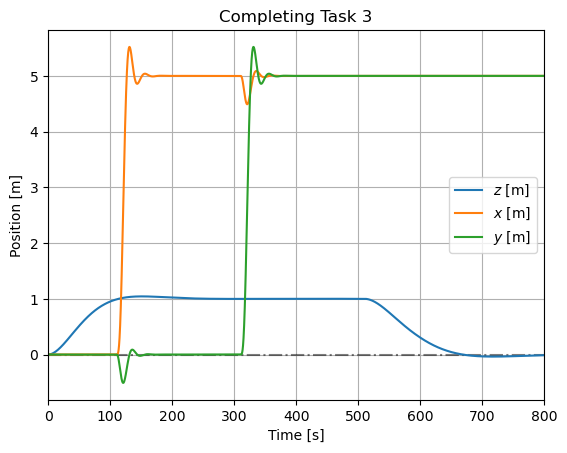

In [201]:
plt.axhline(0, color='k', linestyle='-.', alpha=0.5)
plt.plot(t_l3, [x[6] for x in x_l3], label='$z$ [m]')
plt.plot(t_l3, [x[8] for x in x_l3], label='$x$ [m]')
plt.plot(t_l3, [x[10] for x in x_l3], label = '$y$ [m]')
plt.title('Completing Task 3')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.xlim([0, T3])
plt.grid()
plt.legend()